In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
plt.rcParams['text.usetex'] = True

In [12]:
UTILS={
    "COMP_RES": './results/compiled_results/',
    'DATASET': "Cifar10",
    'TARGET_DIMS':[10,20,30,40],
    'DR_TECHS': ['DiffRed', 'PCA', 'RMap', 'UMap', 'S-PCA', 'K-PCA']
}

In [70]:
def plot(PLOT_DATA:dict, title:str, xlabel:str, ylabel:str, ci:bool=False, alpha=0.1):
    if not ci:
        fig, ax = plt.subplots()
        cmap = get_cmap('viridis', len(PLOT_DATA))
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            x = data['x']
            y = data['y']
            color = cmap(i)
            label = f'{algorithm}'
            ax.plot(x, y, color=color, label=label)

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        fig.legend(
            ncol=1, fancybox=True, shadow=True)
        plt.show()
    else:
        fig, ax = plt.subplots()
        cmap = get_cmap('viridis', len(PLOT_DATA))
        for i, (algorithm, data) in enumerate(PLOT_DATA.items()):
            if algorithm!='RMap':
                x = data['x']
                y = data['y']
                color = cmap(i)
                label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label)
            else:
                x=np.array(data['x'])
                y=np.array(data['y'])
                std=np.array(data['std'])
                ci=1.96*std/np.sqrt(len(x))
                color = cmap(i)
                label = f'{algorithm}'
                ax.plot(x, y, color=color, label=label)
                ax.fill_between(x, (y-ci), (y+ci), color='r', alpha=alpha)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        fig.legend(
            ncol=1, fancybox=True, shadow=True)
        plt.show()

# Stress Plots

In [71]:
METRIC='Stress'
PLOT_DATA={}

In [72]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_23052/2783342416.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', len(PLOT_DATA))


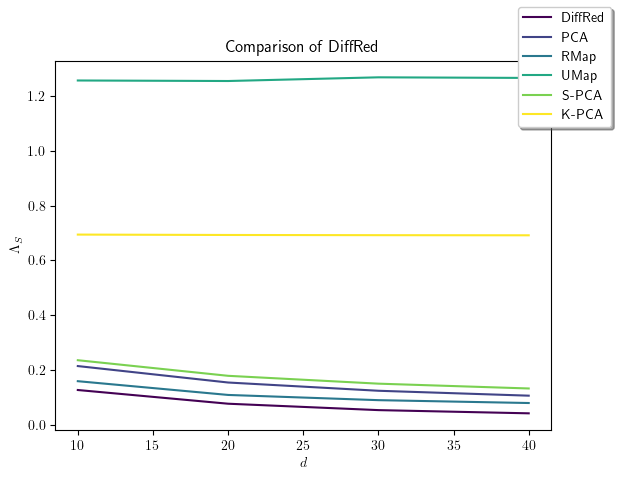

In [74]:
plot(PLOT_DATA, "Comparison of DiffRed", '$d$', r'$\Lambda_S$', True, 0)

In [75]:
PLOT_DATA2={}

In [76]:
for dr_tech in UTILS['DR_TECHS']:
    if dr_tech in ['UMap', 'K-PCA', 'S-PCA']:
        continue
    if dr_tech!='RMap':
        x,y=[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y}
    else:
        x,y,std=[],[],[]
        file_path=os.path.join(UTILS['COMP_RES'], METRIC, dr_tech, f'{UTILS["DATASET"]}.xlsx')
        
        df=pd.read_excel(file_path)
        df=df[df['Target Dimension'].isin(UTILS['TARGET_DIMS'])]
        x=df['Target Dimension'].tolist()
        y=df[METRIC].tolist()
        std=df['stdev'].tolist()

        PLOT_DATA2[dr_tech]={'x':x, 'y':y, 'std':std}

/tmp/ipykernel_23052/2783342416.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('viridis', len(PLOT_DATA))


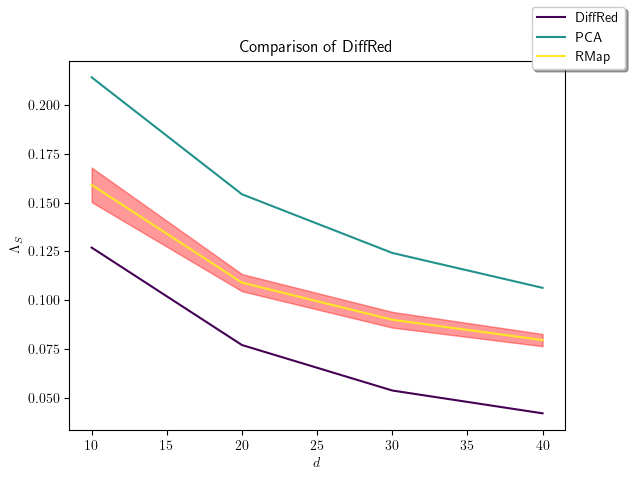

In [77]:
plot(PLOT_DATA2, "Comparison of DiffRed", '$d$', r'$\Lambda_S$', True, 0.4)